# Synthetic vs Real Data

This notebook will look at comparing the real platoon data from the constructed data from the CTGAN.

In [10]:
import pandas as pd

In [11]:
df = pd.read_pickle('CeneriData/cleaned_2003_2019_platoon.pkl')

In [12]:
ax_cols = []
for i in range(1, 10):
    ax_cols.append('{}_{}'.format('AX_W', i))
    #for j in range(0, 10):
        #ax_cols.append('{}_{}_{}'.format('AX_W', i, j))

for i in range(1, 10):
    ax_cols.append('{}_{}'.format('AX_DIST', i))
    #for j in range(0, 9):
        #ax_cols.append('{}_{}_{}'.format('AX_DIST', i, j))

df_noax = df.drop(columns = ax_cols)

no_col = []
for col in df_noax.columns:
    if col[-1].isdigit() and int(col[-1]) > 5:
        no_col.append(col)

df_sm = df_noax.drop(columns=no_col)

import random

df_sm = df_sm.astype(int)

In [13]:
df_sm.columns

Index(['CLASS_1', 'CLASS_2', 'CLASS_3', 'CLASS_4', 'CLASS_5', 'GW_TOT_1',
       'GW_TOT_2', 'GW_TOT_3', 'GW_TOT_4', 'GW_TOT_5', 'LENTH_1', 'LENTH_2',
       'LENTH_3', 'LENTH_4', 'LENTH_5', 'IVT_1', 'IVT_2', 'IVT_3', 'IVT_4',
       'IVT_5', 'SPEED_1', 'SPEED_2', 'SPEED_3', 'SPEED_4', 'SPEED_5', 'AX_1',
       'AX_2', 'AX_3', 'AX_4', 'AX_5', 'Length', 'Weekday', 'Hour'],
      dtype='object')

In [14]:
#Comparing platoon lengths of 5
df_5 = df_sm[df_sm.Length == 5]


In [6]:
df_5.shape

(16545, 33)

In [15]:
from ctgan import CTGANSynthesizer

In [9]:
ctgan = CTGANSynthesizer.load('ctgan_length5_epoch50.pkl')

In [10]:
samples = ctgan.sample(10000)

In [11]:
samples.head()

,CLASS_1,CLASS_2,CLASS_3,CLASS_4,CLASS_5,GW_TOT_1,GW_TOT_2,GW_TOT_3,GW_TOT_4,GW_TOT_5,...,SPEED_3,SPEED_4,SPEED_5,AX_1,AX_2,AX_3,AX_4,AX_5,Weekday,Hour
0,1138,1138,12,1138,1138,30692,20643,35527,38993,12814,...,7449,8890,8189,2,5,5,5,5,1,14
1,1138,1128,1138,99,1138,14363,12284,42727,26903,28323,...,8189,7745,8690,5,5,5,5,4,2,7
2,12,12117,1138,1138,1138,21402,13821,28485,43726,12393,...,9148,7845,8599,2,5,3,5,5,1,15
3,11,1138,99,1128,1128,36174,32541,15717,5410,27191,...,8520,7546,8098,5,5,4,5,5,3,10
4,1138,99,1138,11,12,38004,27641,42625,7054,15770,...,8416,7155,7871,3,5,5,5,5,2,17


In [12]:
df_5.head()

,CLASS_1,CLASS_2,CLASS_3,CLASS_4,CLASS_5,GW_TOT_1,GW_TOT_2,GW_TOT_3,GW_TOT_4,GW_TOT_5,...,SPEED_4,SPEED_5,AX_1,AX_2,AX_3,AX_4,AX_5,Length,Weekday,Hour
1496,11,1138,1138,11127,1138,9531,21576,19818,32588,22628,...,8400,8300,2,5,5,5,5,5,4,11
3813,1138,1138,1138,1138,1138,37445,22995,25970,36026,32212,...,8000,7800,5,5,5,5,5,5,1,8
3914,99,1138,1138,1138,1138,4139,33246,26961,31467,26051,...,8500,8500,2,5,5,5,5,5,1,8
5052,1128,1128,11,1138,1138,22372,24415,13675,20451,19715,...,9000,8800,4,4,2,5,5,5,1,17
5384,1128,1138,1138,1138,1138,27094,28963,20818,27994,30618,...,8700,9500,4,5,5,5,5,5,1,20


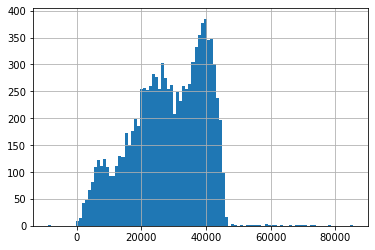

In [19]:
samples.GW_TOT_3.hist(bins=100)

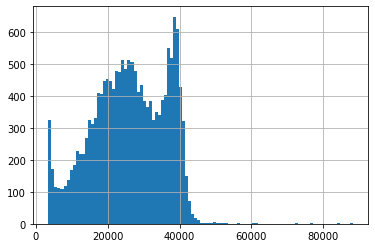

In [21]:
df_5.GW_TOT_3.hist(bins=100)

In [22]:
import seaborn as sns

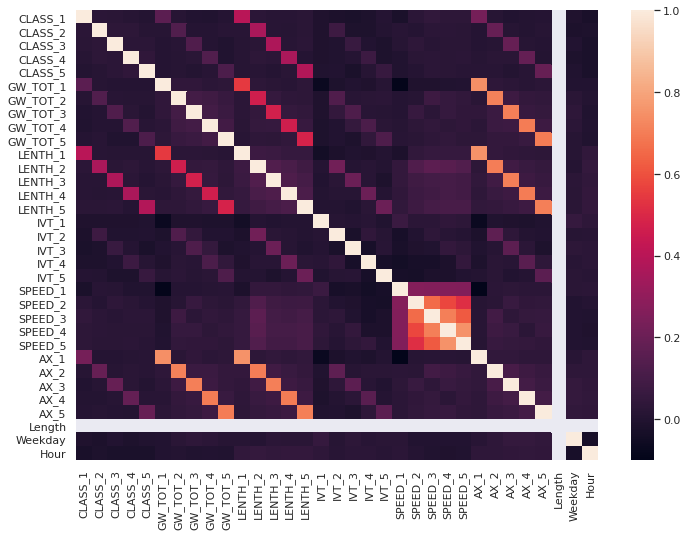

In [26]:
sns.heatmap(df_5.corr())

In [23]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

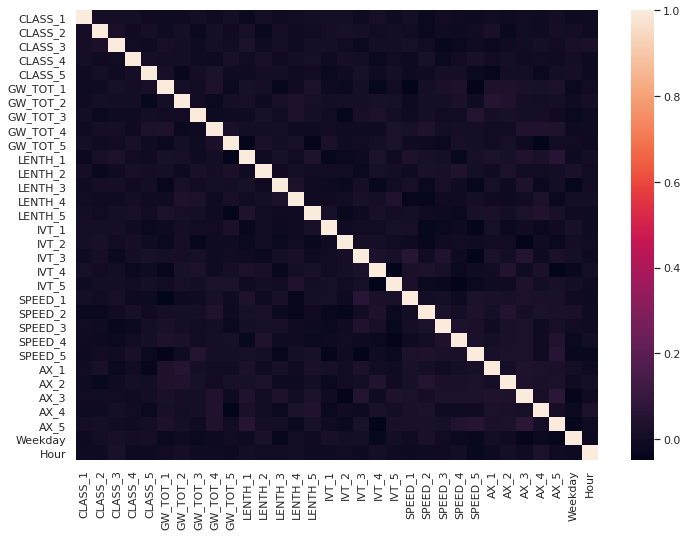

In [27]:
sns.heatmap(samples.corr())

In [16]:
ctgan_5 = CTGANSynthesizer()

In [17]:
discrete_columns = ['CLASS_1', 'CLASS_2','CLASS_3','CLASS_4','CLASS_5','CLASS_6','CLASS_7','CLASS_8', 'CLASS_9', 'Length',
                    'Weekday','Hour','AX_1','AX_2','AX_3','AX_4','AX_5','AX_6','AX_7','AX_8','AX_9']

In [18]:
ctgan_5.fit(df_5, discrete_columns)


/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as 

Epoch 1, Loss G: 1.9479, Loss D: -0.7481
Epoch 2, Loss G: 1.5267, Loss D: 0.1910
Epoch 3, Loss G: 0.8323, Loss D: 0.1895
Epoch 4, Loss G: 0.8869, Loss D: 0.0959
Epoch 5, Loss G: 1.1387, Loss D: -0.0321
Epoch 6, Loss G: 0.5312, Loss D: -0.1474
Epoch 7, Loss G: 0.5884, Loss D: 0.1713
Epoch 8, Loss G: 0.5035, Loss D: 0.0869
Epoch 9, Loss G: -0.2827, Loss D: 0.0074
Epoch 10, Loss G: -0.4826, Loss D: 0.1070
Epoch 11, Loss G: -0.6022, Loss D: -0.0024
Epoch 12, Loss G: -0.8969, Loss D: -0.0525
Epoch 13, Loss G: -0.7816, Loss D: 0.0906
Epoch 14, Loss G: -1.3677, Loss D: 0.0533
Epoch 15, Loss G: -1.5138, Loss D: -0.0492
Epoch 16, Loss G: -1.7197, Loss D: 0.0537
Epoch 17, Loss G: -1.6427, Loss D: -0.0647
Epoch 18, Loss G: -1.7427, Loss D: -0.1147
Epoch 19, Loss G: -1.6239, Loss D: 0.0843
Epoch 20, Loss G: -1.9302, Loss D: 0.0413
Epoch 21, Loss G: -1.9054, Loss D: 0.0675
Epoch 22, Loss G: -2.3327, Loss D: 0.2491
Epoch 23, Loss G: -2.2006, Loss D: -0.0104
Epoch 24, Loss G: -2.2433, Loss D: 0.0093


Epoch 191, Loss G: -0.7324, Loss D: -0.1147
Epoch 192, Loss G: -0.7012, Loss D: -0.3975
Epoch 193, Loss G: -0.9232, Loss D: -0.4581
Epoch 194, Loss G: -0.6876, Loss D: -0.1721
Epoch 195, Loss G: -0.8310, Loss D: 0.0876
Epoch 196, Loss G: -0.7052, Loss D: 0.0780
Epoch 197, Loss G: -0.5687, Loss D: 0.0340
Epoch 198, Loss G: -0.4201, Loss D: -0.0395
Epoch 199, Loss G: -1.0702, Loss D: 0.0344
Epoch 200, Loss G: -1.2612, Loss D: -0.1300
Epoch 201, Loss G: -0.8059, Loss D: -0.0494
Epoch 202, Loss G: -0.6449, Loss D: -0.3048
Epoch 203, Loss G: -0.9488, Loss D: -0.0716
Epoch 204, Loss G: -0.8114, Loss D: -0.2290
Epoch 205, Loss G: -1.0171, Loss D: -0.1841
Epoch 206, Loss G: -0.7474, Loss D: 0.0407
Epoch 207, Loss G: -0.7115, Loss D: -0.4492
Epoch 208, Loss G: -0.8932, Loss D: -0.3395
Epoch 209, Loss G: -0.8881, Loss D: -0.3830
Epoch 210, Loss G: -0.5980, Loss D: -0.1310
Epoch 211, Loss G: -0.9854, Loss D: 0.0495
Epoch 212, Loss G: -0.7702, Loss D: 0.0992
Epoch 213, Loss G: -0.6551, Loss D: 0.0

In [19]:
ctgan_5.save('ctgan_length5_epoch300.pkl')

In [20]:
samples = ctgan_5.sample(10000)

<AxesSubplot:>

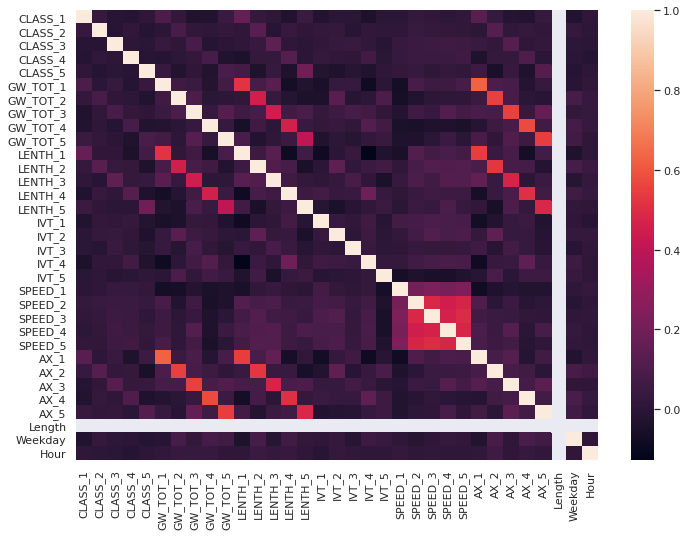

In [24]:
sns.heatmap(samples.corr())

<AxesSubplot:>

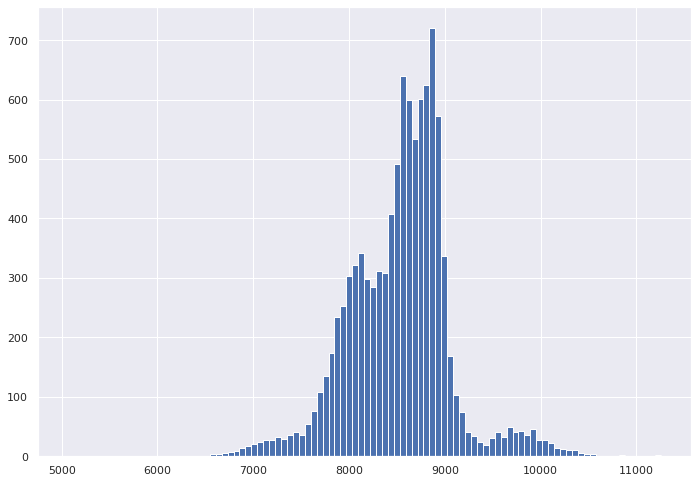

In [39]:
samples.SPEED_1.hist(bins=100)

<AxesSubplot:>

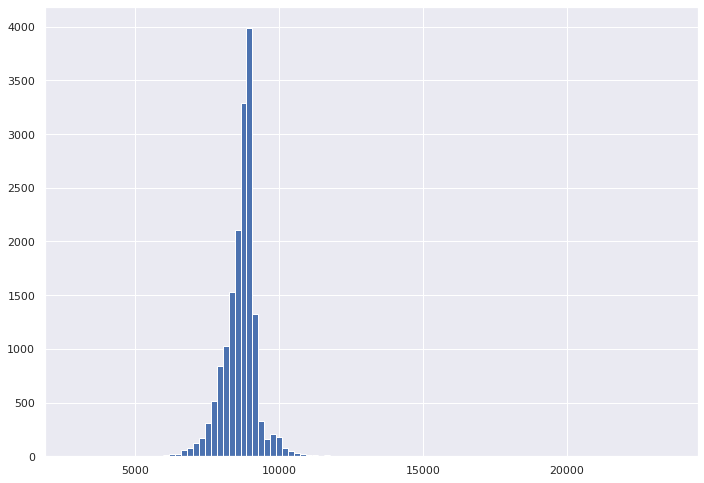

In [40]:
df_5.SPEED_1.hist(bins=100)

In [46]:
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=13)

In [58]:
tmp = pd.DataFrame({'Real': df_5['SPEED_1'], 'Fake': samples['SPEED_1']})

Text(0, 0.5, 'Speed of Vehicle')

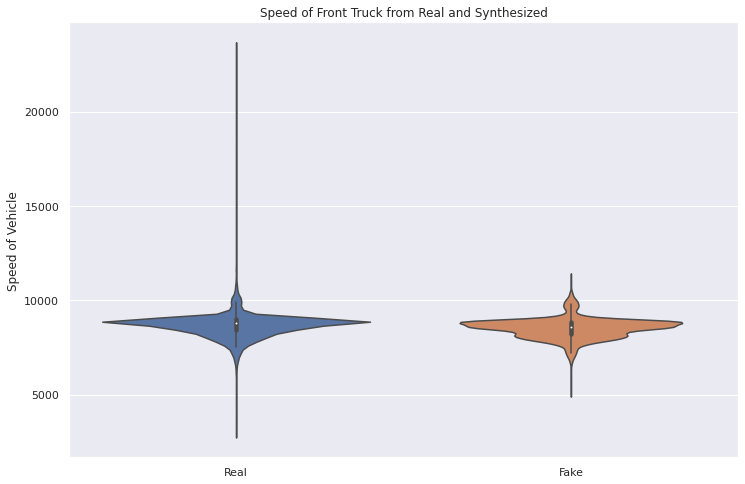

In [59]:
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Speed of Front Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_ylabel('Speed of Vehicle')

Text(0, 0.5, 'IVT in seconds')

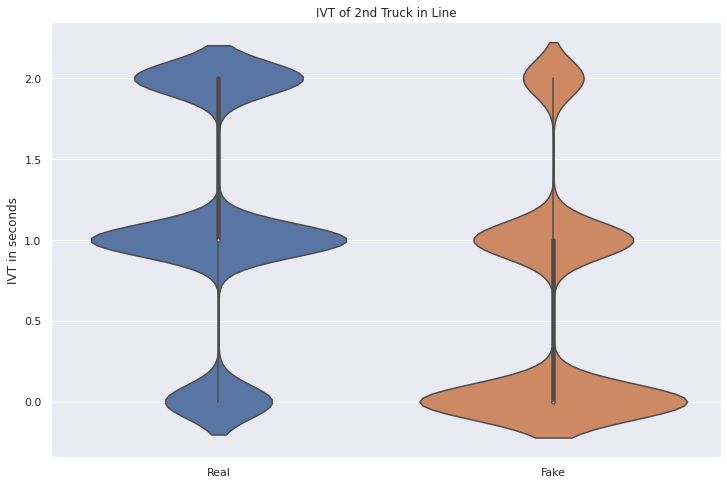

In [56]:
tmp = pd.DataFrame({'Real': df_5['IVT_2'], 'Fake': samples['IVT_2']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('IVT of 2nd Truck in Line')

axes.yaxis.grid(True)
axes.set_ylabel('IVT in seconds')

Text(0, 0.5, 'Weight of Vehicle')

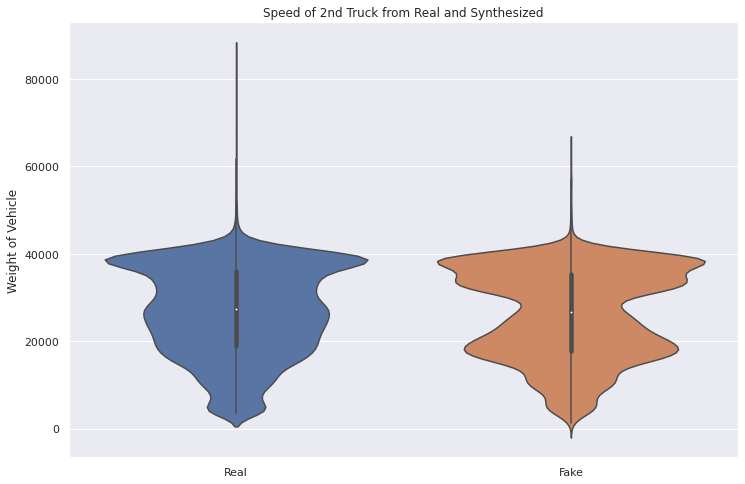

In [63]:
tmp = pd.DataFrame({'Real': df_5['GW_TOT_2'], 'Fake': samples['GW_TOT_2']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Speed of 2nd Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_ylabel('Weight of Vehicle')

Text(0.5, 0, 'Length of Vehicle')

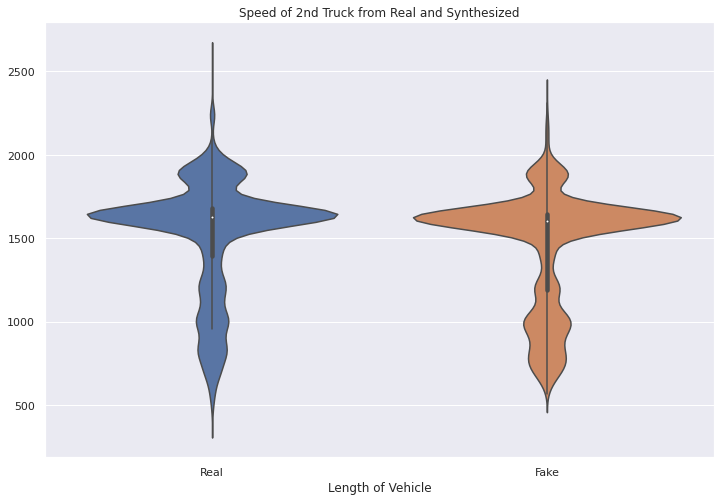

In [64]:
tmp = pd.DataFrame({'Real': df_5['LENTH_2'], 'Fake': samples['LENTH_2']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Speed of 2nd Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_xlabel('Length of Vehicle')